# Questionnaires in OpenSesame

In [3]:
from jupyterquiz import display_quiz

##  Introduction
In this tutorial we are going to show how you can administer long questionnaires in OpenSesame. The example is similar to a solution in E-Prime that can be downloaded [here](https://www.henkvansteenbergen.com/open-science#Questionnaire).

Assume you want to present the [50-item long International Personality Item Pool](https://ipip.ori.org/new_ipip-50-item-scale.htm), embedded in an OpenSesame experiment.

One option is to create customs forms in OpenSesame as explained [here](https://osdoc.cogsci.nl/manual/forms/about/). In this tutorial we use Canvas functions instead. Below we show step-by-step how you can create a fully customizable and quite flexible questionnaire. This tutorial also allows you to apply a lot of coding knowledge you obtained earlier! Let's start!

## Step 1. Sketch the basic outline of your questionnaire
Suppose we want to present 5 sheets (or pages) of questions with 10 questions of the IPIP per sheet. To do so, we can use Canvas commands to draw text and rectangles at particular locations.

Actually, we need quite a lot of elements! In the figure below we present a possible outline of 10 questions (named `qst01` to `qst10`), a general header for this sheet (named `qhd`) and 9 options to choose from per question (named `rt011` to `rt019` for the first question, `rt021` to `rt029` for the second question, etcetera).

![](images/overviewques.png)
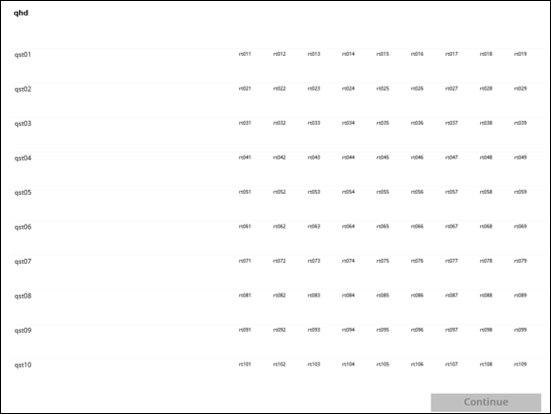

In addition, we add some shapes to the canvas. Above each question, we present a rectangle of height 1 pixel (basically a line) named `qst01bg` to `qst10bg`. We also create a "Continue" button to proceed to the next sheet. And around all 90 options there is rectangle that can get colors black (indicating it is selected) or the background color of the canvas (white), indicating it is not selected. These rectangles are named `rbxxx`  (`rb011` to `rb019` for the first question, `rb021` to `rb029` for the second question, et cetera).

We first sketched this outline on a piece of paper and then played around with finding some nice coordinates at the screen. For each element in the Canvas we have to provide the position (x and y-coordinate in pixels relative to the center of the screen), and its size (width and height in pixels). This information can be hard-coded in the script. Or simply be stored in variables.


## Step 2. Create a Canvas and add the Continue button

Open the template provided [here]( https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Questionnaire_step0.osexp). Note that the AllQuestionnaires loop already contains the [freely available](https://ipip.ori.org/new_ipip-50-item-scale.htm) 50 items of the IPIP.

In the template the RunOneSheetOf10Items has to present sheet 1 (items 1 to 10) and 5 (items 41 to 50) of the IPIP. This is just an example for this tutorial and to make debugging easy. Of course, you can add/modify sheets later on by editing this list. The column QuestStartRow provides information where to find these items in the AllQuestionnaires loop.

The `sheet_seq` includes three python inline objects. During this tutorial you will write the code for these three objects. Make sure you reserve sufficient time for this tutorial, because there are quite some steps involved!

Open the `init_qcanvas` inline object, create a Canvas and show the Continue button using the code below

```
my_canvas = Canvas(penwidth = 1, fill = False, color = u'white')

#OK button
my_canvas["OKbutton"] = Rect(290, 345, 205, 34, color = u'silver', fill = True)
my_canvas["OKbutton_t"] = Text("Continue", center=True, x=393, y=360, max_width=205, color = u'gray', font_size=18, font_bold=True)

my_canvas.show()
```

Now, open the `refr_qcanvas` inline object and use the following code to wait for a mouse key.

```
my_mouse = Mouse(visible=True)
#wait for mouse click
button, pos, time = my_mouse.get_click()
```

Run the experiment and confirm that you see the Canvas with the Continue button. The Canvas is presented twice because `RunOneSheetOf10Items` contains two rows.

## Step 3. Add the header

Let's go back to the `init_qcanvas` object and insert new code before the `my_canvas.show()` command.

We first retrieve information from the AllQuestionnaires loop by loading all information as in a `dm` datamatrix variable. Note that a datamatrix is very similar to a dataframe, but has some features that are particular handy in OpenSesame (learn more [here](https://datamatrix.cogsci.nl/0.13/)) as it provides a direct interface to loop objects.

 ```
#get data from AllQuestionnaires loop
dm = items['AllQuestionnaires'].dm
```

Now, we can use the `QuestStartRow` variable to find the correct row in the AllQuestionnaires datamatrix that contains the ItemDescription we want to show as header. Note that we use -1 because the datamatrix is zero-based (first row is number 0) whereas the loop shown in OpenSesame is one-based (first row is number 1)! Let's use a print statement to verify we have the right information.

```
#header
print(dm[var.QuestStartRow-1].ItemDescription)
```

Run the experiment again and check whether the Console contains the right information. Remove the -1 and compare the results.

As a next step, let's print the actual text of the header to the Canvas. Note the name of this element in the Canvas is `qhd` (see sketch above).

```
my_canvas['qhd'] = Text(dm[var.QuestStartRow-1].ItemDescription, center=False, x=-490, y=-372, max_width=983, color = u'black', font_size=13, font_bold=True)
```

Check whether this works.

## Step 4. Add the text of the questions
We now can start adding the text of all questions and all options, using the names described in the sketch above. The script we write allows to use 9 options per sheet. Later on we will make sure that options are only clickable if there is a text associated with that option. The IPIP example has only 5 possible answers and uses options 3 to 7; o01, 02, 08, and 09 will therefore be left empty in this case.

Because we have to print 10 questions and 10 lines above each questions (and later on 90 options) we use a loop instead of manually entering all x and y positions per text item. 

The vertical distance between each question is available in `qs_ydist`. The x and y position of `qst_01`, and the width and height are also stored as variables. The loop runs from 1 to 10 and then prints the text `qst_xx` and the horizontal line 2 pixels above it (`qst_xx_bg`).

```
#define coordinates of questions
qs_ydist = 64; qs_w = 400; qs_h = 60; qs_x = -488; qs_y = -294

#loop questions (y)
for i in range(1,10+1):
    #questions
    my_canvas['qst' + str(i).zfill(2)] = Text(dm[var.QuestStartRow+i-1].ItemDescription, center=False, x=qs_x, y=qs_y+((i-1)*qs_ydist), max_width=qs_w, color = u'black', font_size=12)
    my_canvas['qst' + str(i).zfill(2) + "bg"] = Rect(qs_x, qs_y+((i-1)*qs_ydist)-2, 990, 1, fill = True, color = u'whitesmoke')
```

In [4]:
display_quiz("questions/question_1.json")

<IPython.core.display.Javascript object>

Test your code. Do you see 10 questions presented per sheet?

## Step 5. Add the options
Now it is time to add the 90 options to the canvas. Actually we add 180 objects: 90 text objects (named `rtxxx`) and 90 'clickable' squares without fill (named `rbxxx`) around these text objects.

We can nest a new loop into the `for i in` loop, using variable j that runs from 1 to 9.

Again, we define the positions of the options in separate variables too. Use the code below to replace the code in step 4.

```
#define coordinates of questions
qs_ydist = 64; qs_w = 400; qs_h = 60; qs_x = -488; qs_y = -294
#define coordinates of options
opt_xdist = 64; opt_ydist = 64; opt_w = 60; opt_h = 60; opt_x = -71; opt_y = -294


#loop questions (y)
for i in range(1,10+1):
    #questions
    my_canvas['qst' + str(i).zfill(2) + "bg"] = Rect(qs_x, qs_y+((i-1)*qs_ydist)-2, 990, 1, fill = True, color = u'whitesmoke')
    my_canvas['qst' + str(i).zfill(2)] = Text(dm[var.QuestStartRow+i-1].ItemDescription, center=False, x=qs_x, y=qs_y+((i-1)*qs_ydist), max_width=qs_w, color = u'black', font_size=12)
    
    #loop options (x)
    for j in range(1,9+1):
        #options
        my_canvas['rb' + str(i).zfill(2) + str(j)] = Rect(opt_x+((j-1)*opt_xdist), opt_y+((i-1)*opt_ydist), opt_w, opt_h)
        my_canvas['rt' + str(i).zfill(2) + str(j)] = Text(getattr(dm[var.QuestStartRow+i-1],"o0" + str(j)), center=False, x=opt_x+((j-1)*opt_xdist), y=opt_y+((i-1)*opt_ydist), max_width=opt_w, color = u'black', font_size=10.5)

```

Run the file. Experiment with the location of the options and questionnares by changes the x and y values. Make sure you understand what the code is doing.

In [7]:
display_quiz("questions/question_2.json")

<IPython.core.display.Javascript object>

## Step 6. Mark preselected options

The `AllQuestionnaires` loop contains a column `PreSelection` that allows to mark already a particular option per question when the slide is presented.

We first retrieve the information about the preselection from the datamatrix.

```
RSelected = dm[var.QuestStartRow-1+1:var.QuestStartRow-1+11].PreSelection
```

Note that we will keep updating the variable RSelected when participants select an option with their mouse later in the script.

In [8]:
display_quiz("questions/question_3.json")

<IPython.core.display.Javascript object>

Around all 90 options there is a rectangle object (named `rb011` to `rb019` for the first question, `rb021` to `rb029` for the second question, et cetera) that can get colors black (indicating it is selected) or the background color of the canvas (white), indicating it is not selected.

The code below updates the color of all 90 rectangles:

```
RSelected = dm[var.QuestStartRow-1+1:var.QuestStartRow-1+11].PreSelection
#update selection of all options depending on values in RSelected
for i in range(1,10+1):
    for j in range(1,9+1):
        if (RSelected[i-1]==j) & (my_canvas['rt' + str(i).zfill(2) + str(j)].text != ""):
            my_canvas['rb' + str(i).zfill(2) + str(j)].color = u'black'
        else:
            my_canvas['rb' + str(i).zfill(2) + str(j)].color = u'white'
```

Experiment with the PreSelection values in the loop. Do you see the correct options gets marked?

In [9]:
display_quiz("questions/question_4.json")

<IPython.core.display.Javascript object>

Congratulations! You have finished the first part of the experiment that presents the canvas. Hang on to do more cool stuff!

## Step 7. Continously update the content of the Canvas until the user clicks "Continue"

Let's now work on the `refr_qcanvas` inline. This one has the most complex code so far. Let's think before we code! We need to  consider the following requirements:
- we do only allow one response per question: whenever an option is clicked, unmark the previous selection (if any)
- enable the OK button only after all questions have been answered. So keep it "greyed out" by default.
- if the user click on something that is not option or the OK button, do nothing (redrawing the canvas is not necessary). However, if we change the canvas, we have to redraw the canvas to the screen
- we keep showing the screen as long as the user (participant) has not clicked the OK button (to do so we will use a loop that continuously runs some code while we do not update the screen; the user is simply not aware of this loop because the screen stays the same)
- we do not have to update the cursus position on the screen each time the mouse moves. This is automatically done by the Operating System.

Now you need a piece of paper (or a tool like MS Visio) to sketch a diagram that does all of this in a way that makes sense. For example, the diagram below shows one implementation of a solution. Note that the diagram is still a bit simplified and we need a couple of more nested loops and decisions to make everything work perfectly.

![](images/flowchart.png)

Let's try to describe what the diagram shows. We basically have a big loop that is repeated as long as the user does not press the OK button (once enabled). Within the loop, we first wait for a mouse click. We then check whether the user clicked the option or the OK button and take the actions as described in the flow chart. After that we check whether all questions are answered and enabled the OK button in that case. Finally, if a refresh of the screen is needed we draw the updated canvas to the screen (otherwise, the screen is not updated and hence stays as it was).

There are at least two "states" of the experiment that we should keep in the working memory of the computer: 1) whether the OK button was selected or not (this is checked each time at the top of the loop), and 2) whether a refresh of the screen is needed (this state is TRUE when the OK button is enabled and/or when the user made a new selection). 

Open the `refr_qcanvas` inline and add the following lines to the top of the script. This gives initial values to the variables that save the two "states" which can be changed later on in the script.

```
OK_pressed = False
refresh_needed = True
```

### Add the big loop
Let's now add the big loop that repeats itself until OK_pressed is True. Make sure you nest the existing code that waits for a mouse click into this loop, like in the code below:

```
#big loop: refreshes questionnaire until all options are answered
while not (OK_pressed):
    my_mouse = Mouse(visible=True)
    #wait for mouse click
    button, pos, time = my_mouse.get_click()
    
    
```

In [10]:
display_quiz("questions/question_5.json")

<IPython.core.display.Javascript object>

### Check what was clicked
To check whether something was clicked at we need the `elements_at(x,y)` function of the Canvas object (learn more [here](https://osdoc.cogsci.nl/manual/python/canvas/#Canvas-elements_at)). 

This function returns a list of object names that are 'below' a particular (x,y) coordinate in the respective Canvas.

So if we use the x and y position of the mouse at the moment the user clicked, we can ask elements_at to provide the names of the objects (if any) that were below the mouse cursor.

Let's try whether this works. Add the following code below the wait for mouse click code.

```
    if pos is not None:
        x, y = pos
        print('Clicked on elements: %s' % my_canvas.elements_at(x, y))
```

Now run the experiment in Windowed mode (>> button) and check which results you see in the output console. What names appear when you click the text belonging to an answer option? And what does appear when you click the OK button?

If you understand how the elements_at function work, you can comment out the print line (do not remove it, perhaps you need it again at a later stage when debugging your code).

Given that the `elements_at` function returns a list (objects in a canvas can overlap spatially), we need a loop that runs over all object names in the list and check whether that object is a 'clickable' option or the OK button.

The loop below assign the string `ce` (short for canvas element) sequentially to each element of the list.

```
        for ce in my_canvas.elements_at(x, y):
```

Tip: add a print statement nested in the loop to show the content of ce while you run the experiment in Windowed mode if you do not yet understand the function of this loop.

### Check whether an option was clicked
To check whether an option was clicked (it has name `rbxxx`) we can simply check whether the name of the object contains `rb`. This can be done because `rb` is a unique substring that is not part of any other object names in the Canvas.

To do so, we can use the find command of the string class, which returns the position of the substring in the string or -1 if it was not found. In our case the position should be 0 (i.e. rb is found in the first position of the string, e.g. `rb` is found in `rb011`). And we also check whether the associated text at this position (e.g. `rt011` when `rb011` is clicked) is not empty.

```
            if ce.find("rb") == 0:
                #check if the associated text at this position is not empty (only clickable if there is text)
                if my_canvas["rt"+str(ce[2::])].text != "":

```

If all these conditions are met we know the option that is clicked and we can save this as an integer into a variable we call `newsel`. 

We also retrieve the previous selection of this question which is available in `RSelected` and store it into the integer `oldsel`:



```
                    newsel = int(ce[4:5])
                    oldsel = int(RSelected[int(ce[2:4])-1])

```

Finally, if the new selection differs from the old selection, we set `refresh_needed` to True, update `RSelected`, remove the border of the old selection and add the border to the new selection.

```
                    if newsel != oldsel:
                        refresh_needed = True
                        RSelected[int(ce[2:4])-1] = newsel
                        #remove border old selection
                        if oldsel != 0:
                            my_canvas['rb' + str(ce[2:4]) + str(oldsel)].color = u'white'

                        #add border new selection
                        my_canvas['rb' + str(ce[2:4]) + str(newsel)].color = u'black'
```

Now check the flowchart above. We basically now finished the first branch of the decision flow in the loop (although we needed quite some additional conditionals and a loop not shown in detail there).

### Update the Canvas

Let's also add the last branch of the flowchart that updates the Canvas so that we can test whether everything works so far. Note that we set `refresh_needed` immediately to `False` after we have drawn the Canvas. This prevents that the Canvas is redrawn by default after each mouse click. It will only be redrawn when `refresh_needed` is set to `True` again (somewhere else in the code).

```
    #check if refresh is needed
    if refresh_needed:
        my_canvas.show()
        refresh_needed = False
```

Now run the experiment and check whether you can select the options using your mouse. 

If something does not work properly, compare all your code in `refr_qcanvas` to the code below. It should look like:

```
OK_pressed = False
refresh_needed = True

#big loop: refreshes questionnaire until all options are answered
while not (OK_pressed):
    my_mouse = Mouse(visible=True)
    #wait for mouse click
    button, pos, time = my_mouse.get_click()
    
    if pos is not None:
        x, y = pos
        print('Clicked on elements: %s' % my_canvas.elements_at(x, y))
        for ce in my_canvas.elements_at(x, y):
            if ce.find("rb") == 0:
                #check if the associated text at this position is not empty (only clickable if there is text)
                if my_canvas["rt"+str(ce[2::])].text != "":            
                    newsel = int(ce[4:5])
                    oldsel = int(RSelected[int(ce[2:4])-1])
                    if newsel != oldsel:
                        refresh_needed = True
                        RSelected[int(ce[2:4])-1] = newsel
                        #remove border old selection
                        if oldsel != 0:
                            my_canvas['rb' + str(ce[2:4]) + str(oldsel)].color = u'white'

                        #add border new selection
                        my_canvas['rb' + str(ce[2:4]) + str(newsel)].color = u'black'
                        
    #check if refresh is needed
    if refresh_needed:
        my_canvas.show()
        refresh_needed = False
```

### Check whether the OK button was clicked
e are almost there! Have a look at the flowchart and let's implement the second branch in the loop. This is relatively straightforward: we check whether the name of ce is `OKbutton`, and if so, if the color of the text of the OKbutton (named `OKbutton_t`) is black. If both conditions are true we set `OK_pressed` to `True`. Make sure you insert this code above the     code that checks if a refresh is needed (and nested into the `ce` loop).


```
            # check if OK button was clicked
            if (ce == "OKbutton"):
                if (str(my_canvas["OKbutton_t"].color) == "black"):
                    OK_pressed = True

```

### Check whether all questions are answered

Finally, we have to check whether all questions were answered (the third branch in the flowchart). We basically know that not all questions are answered if there are still elements in `RSelected` with the value 0. 

To translate this logic in a script we create a new variable called `allselected` and we give it initial value of `True` (assuming all questions are answered). We now loop over all 10 questions and check whether the associated RSelected value is 0. Whenever this happens, we 'veto' the decision and set `allselected` to `False`. We need the following code for this:

```
    #check if all selections are made already
    allselected = True
    for i in range(1,10+1):
        if (RSelected[i-1] == 0):
            allselected = False
```

Let's now consider a slightly different scenario. Assume that in some cases we do not to fill all 10 questions in a sheet. For example, when we have a questionnaire with 25 items, 2 sheets can present 10 items and the final sheet only 5 items. Of course we do not require participant to make a selection of an option that does not have a question.

So let's change the code and only 'veto' the decision if the Rselected value is 0 and at the same time the related question is not empty:

```
    #check if all selections are made already
    allselected = True
    for i in range(1,10+1):
        if (RSelected[i-1] == 0) & (my_canvas['qst' + str(i).zfill(2)].text != ""):
            allselected = False
```

Insert this code before the check if a refresh is needed. Now, we finally also need to 'enable' the OK button by making the text color 'black' when `allselected` equals `True`

```
    if allselected:
        #enable OK button
        my_canvas["OKbutton_t"].color = u'black'
```

Note that we do not have to set refresh_need to True once more because the allselected status will by definition only change when an option is clicked (which itself forces a refresh already). 

Check whether the questionnare works properly now and proceeds to the next sheet of questions after you click Proceed. Also experiment with the PreSelection feature. 


In [11]:
display_quiz("questions/question_6.json")

<IPython.core.display.Javascript object>

## Step 8. Logging all answers

When analysing the data later on it is convenient if the answer to each item of a questionnaire is stored in a separate row in the log file (i.e. long format). However, to create a new row in the log file, we have to call the `logger` object multiple times. The easiest solution for this is to fill a loop with relevant information and let OpenSesame run this loop sequentially to store the information row by row into the log file.

The template file consists of a `queslog_loop` that is doing exactly this. We only need to create a script in `log_answers` that overwrites the values in the 11 rows (1 header and 10 questions) in the `queslog_loop` object.

We can do this in a simple loop that retrieves all the relevant information from the AllQuestionnaires loop (stored in `dm`), the selection options (stored in `RSelected`) and the actual text displayed for the selected option (stored in the `rtxxx` object in the Canvas). 

This is the code you need:

```
# All questions are answered. Now save all the information from this sheet to the question_log so that all information is logged in a LONG (not WIDE) format
for i in range(1,11+1):
    items['queslog_loop'].dm[i-1].ItemID = dm[var.QuestStartRow+i-2].ItID
    items['queslog_loop'].dm[i-1].ItemDescr = dm[var.QuestStartRow+i-2].ItemDescription
    if i > 1: #not a header
        items['queslog_loop'].dm[i-1].ChosenOption = RSelected[i-2]
        items['queslog_loop'].dm[i-1].ChosenOptDes = my_canvas['rt' + str(i-1).zfill(2) + str(RSelected[i-2])].text

```

Your questionnaire is now complete! Run the experiment and check whether your log file contains the right information for the columns `ItemID`, `ItemDescr`,`ChosenOption`, and `ChosenOptDes`.


## Exercises

### Exercise 1. Update the OK button earlier
When you set all the PreSelections of all questions to 9 the OK button stays grey until you click somewhere. How would you change the code so that this refresh is done BEFORE the user clicks the mouse? Which branches in the flowchart have to move? Try this is in your own code.

### Exercise 2. Create a striped color layout
Change the `qst01bg` to `qst10bg` objects to rectangles with height `opt_h` that are only present for odd-numbered items. This creates a striped color layout of your questionnaire as in the example below:
![](images/ques_striped.png)

To avoid white rectangles around the options not selected, make sure you also set the color of unselected options to `whitesmoke` instead of `white` in the odd-numbered rows. Note that you have to change this in two places in your script. 

### Exercise 3. Make the code more compact
There might be places where the code could be written in a more compact way. For example, two nested if's could be replaced by one if that combines the conditional expressions with a logical AND-operator. However, you may run into the risk that your code is (even) more difficult to understand. ;) Experiment with replacing the if... nested in the `if ce.find("rb") == 0` conditional.

### Exercise 4. Radio-button layout (advanced level!)
Change the layout of the questionnaire, replacing the squares with radio-buttons (e.g. a big circle with a smaller circle that can be filled or not) next to the text.

### Exercise 5. Insert the countdown timer in the flanker task
Open your solution to Exercise 1 of the Eriksen flanker task tutorial (chapter 3) in OpenSesame and replace the 30-seconds break between the test blocks by the animated countdown timer you created during today's python Exercise 2.

Note that you have to use slightly different Canvas functions in OpenSesame. Also the coordinate system is different. The `arc` function is not available in OpenSesame and as a work-around we use a solution provided on the OpenSesame forum that uses the `Pie` function from `psychopy`. The code below gives you some basic code you can adapt yourself.

```
# arc solution from https://forum.cogsci.nl/discussion/7326/mixing-psychopy-and-canvas-elements
from openexp._canvas._element.psycho import PsychoElement
from openexp._canvas._element.element import Element
from psychopy.visual import Pie

class CustomElement(PsychoElement, Element):

    def __init__(self, canvas, extent=90):

        self._extent = extent
        super().__init__(canvas)

    def prepare(self):

        self._stim = [
            #fillColor in rgb values ranging from -1 to 1
            Pie(win, radius=252, fillColor=[-.5, -.5, -.5 ], start=0, end=0-self._extent),
        ]

    def show(self):

        if self.visible:
            for stim in self._stim:
                stim.draw()


my_canvas = Canvas(penwidth = 1, fill = True, color = u'white')

my_canvas.ellipse(-250,-250,500,500,color=u'red')
my_canvas['arc'] = CustomElement(my_canvas, extent = 120)
my_canvas.ellipse(-200,-200,400,400,color=u'white')
my_canvas.show()
```